# Instructions on Running the Notebook

Follow these steps to run the notebook on Kaggle.com:

1. **Create a New Notebook:**
   - Visit Kaggle.com and log in.
   - Create a new notebook.

2. **Upload the Notebook:**
   - Upload the provided notebook into the newly created one.

3. **Add the Dataset:**
   - Navigate to the Sidebar.
   - In the Data section, click on Add Data.

4. **Access the Dataset:**
   - Use the following link to access the dataset: [Chest X-ray Pneumonia Dataset](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia).
   - Search for the provided dataset and add it to your notebook.

5. **Run All Cells:**
   - Once the dataset is added, run all the cells in the notebook.

6. **Enjoy:**
   - Explore the notebook and enjoy the results!


Happy coding!

### Some Important Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1. Import Data & Visualization

### The Dataset is avaliable [here](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data).

In [2]:
# Content of the dataset
os.listdir("../input/chest-xray-pneumonia/chest_xray")

['chest_xray', '__MACOSX', 'val', 'test', 'train']

**The dataset is divided into three sets:**
*  Train set 
*  Validation set and 
*  Test set

In [3]:
len(os.listdir("../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"))

3875

* ### Visualize some NORMAL & PNEUMONIA Images to see the difference

Train set:
PNEUMONIA=3875
NORMAL=1341

Test set:
PNEUMONIA=390
NORMAL=234

Validation set:
PNEUMONIA=8
NORMAL=8


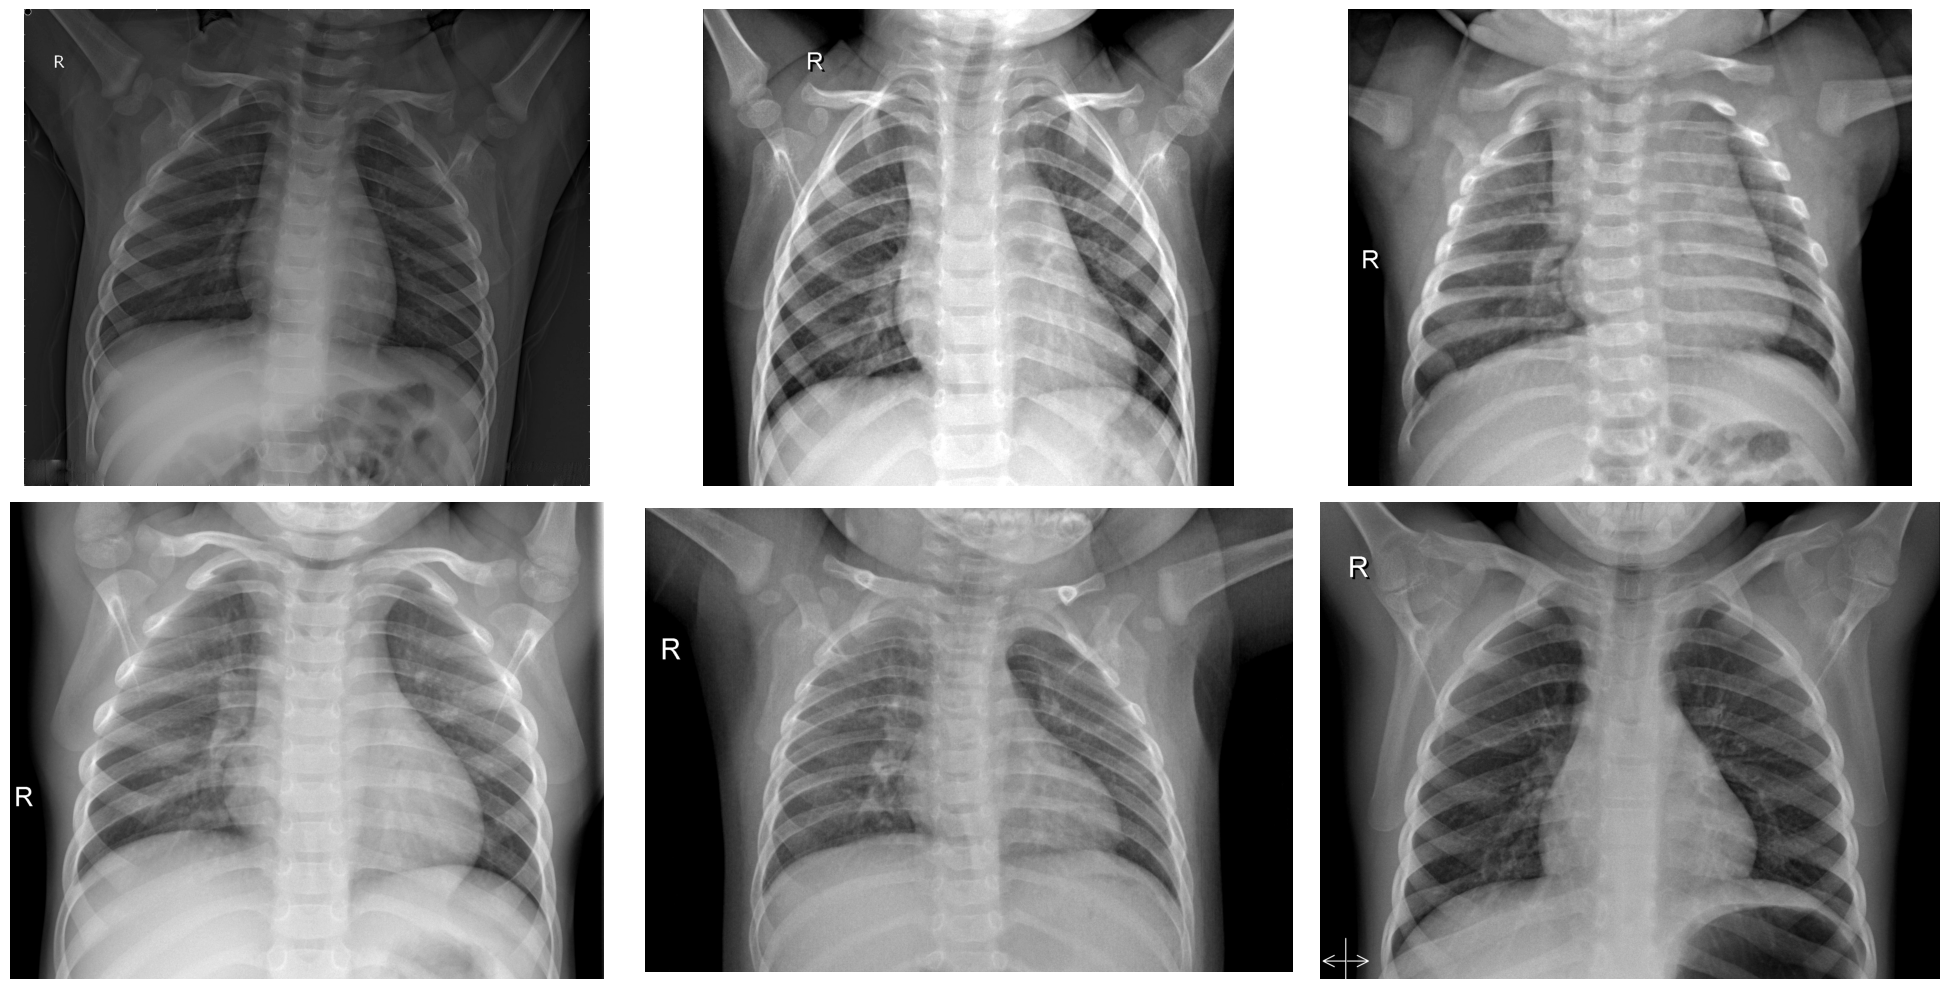

In [4]:
train_dir = "../input/chest-xray-pneumonia/chest_xray/train"
test_dir ="../input/chest-xray-pneumonia/chest_xray/test"
val_dir = "../input/chest-xray-pneumonia/chest_xray/val"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("\nTest set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("\nValidation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")


normal = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/NORMAL")
normal_dir = "../input/chest-xray-pneumonia/chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()



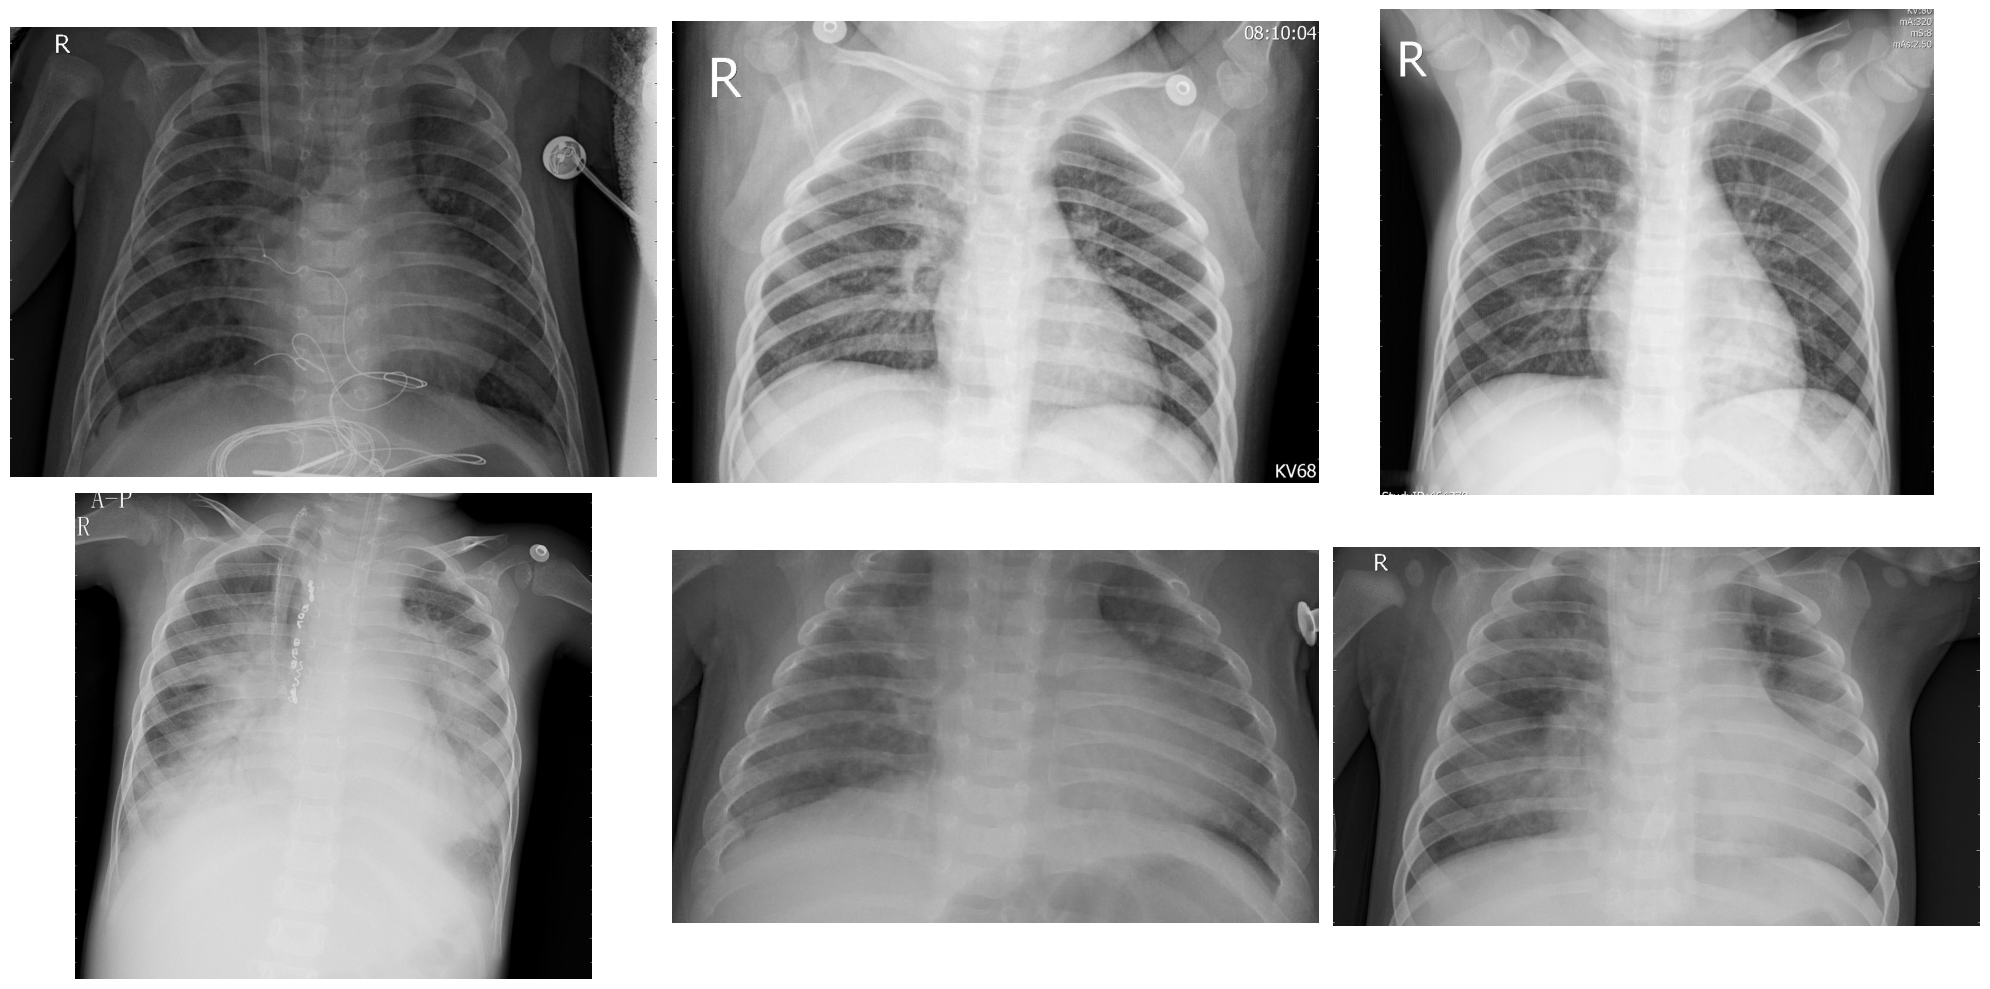

In [5]:
pneumonia = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA")
pneumonia_dir = "../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

* ### Visualization and Analysis of a single Image

The dimensions of the image are 1128 pixels width and 1336 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 73.2978 and the standard deviation is 38.1653


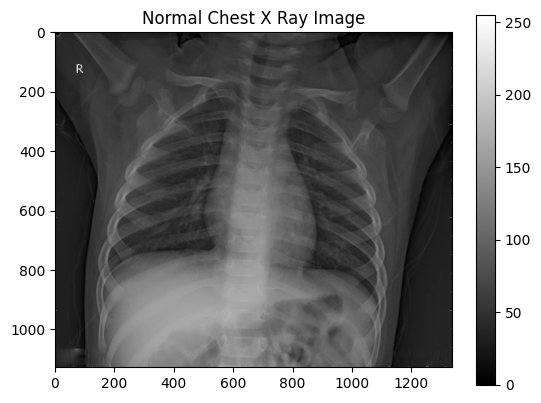

In [6]:
normal_img = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/NORMAL")[0]
normal_dir = "../input/chest-xray-pneumonia/chest_xray/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Normal Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

The dimensions of the image are 925 pixels width and 1056 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 97.4003 and the standard deviation is 57.8386


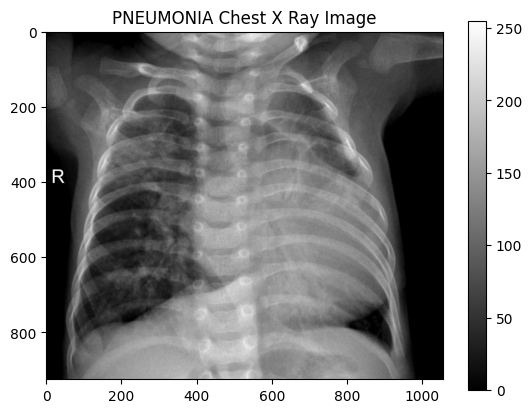

In [7]:
PNEUMONIA_img = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA")[1000]
PNEUMONIA_dir = "../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"
sample_img = plt.imread(os.path.join(PNEUMONIA_dir, PNEUMONIA_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('PNEUMONIA Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

* ### base_outputVisualization of Pixel Intensity Distribution in an Image

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(-21.180555555555557, 0.5, '# Pixels in Image')

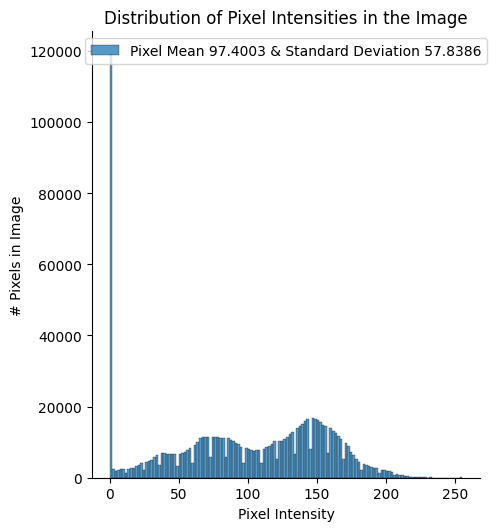

In [8]:
sns.displot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

---

# 2. Image Preprocessing



* ### Data Augmentation







# Image Data Generator Function Explanation

The `image_gen` function uses Keras's `ImageDataGenerator` to create data generators for image datasets with optional data augmentation.

## Parameters:

- **aug (Boolean):**
  - If True, applies data augmentation to the training set; otherwise, only rescales all sets.

- **train_dir, test_dir, val_dir (String):**
  - Paths to the training, testing, and validation set directories.

## ImageDataGenerator Configuration:

- **Training Augmentation:**
  - If `aug` is True, applies rotation, width shift, shear, zoom, sample-wise centering, and standardization.

- **Testing and Validation:**
  - All sets are rescaled by a factor of 1/255.

## Data Flow Configuration:

- **Training Set (`train`):**
  - Batch size of 8, shuffled, 'binary' class mode, target size (180, 180).

- **Testing Set (`test`):**
  - Batch size of 1, not shuffled, 'binary' class mode, target size (180, 180).

- **Validation Set (`val`):**
  - Batch size of 1, not shuffled, 'binary' class mode, target size (180, 180).

## Return Value:

A tuple containing the data generators for the training, testing, and validation sets, respectively.



In [9]:
# Fix Seeding
keras.utils.set_random_seed(812)

In [10]:

def image_gen(aug, train_dir, test_dir, val_dir):
    if aug:
        datagen = ImageDataGenerator(
            rescale=1/255,
            rotation_range=20,
            width_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            samplewise_center=True,
            samplewise_std_normalization=True
        )
    else:
        datagen = ImageDataGenerator(rescale=1/255)



    train_generator = datagen.flow_from_directory(
        train_dir,
        batch_size=8,
        shuffle=True,
        class_mode='binary',
        target_size=(180, 180)
    )

    test_generator = datagen.flow_from_directory(
        test_dir,
        batch_size=1,
        shuffle=False,
        class_mode='binary',
        target_size=(180, 180)
    )

    val_generator = datagen.flow_from_directory(
        val_dir,
        batch_size=1,
        shuffle=False,
        class_mode='binary',
        target_size=(180, 180)
    )

    return train_generator, test_generator, val_generator


* ### Augmented Data

In [11]:
train, test, val = image_gen(aug=True, train_dir =  "../input/chest-xray-pneumonia/chest_xray/train",
    test_dir = "../input/chest-xray-pneumonia/chest_xray/test",
    val_dir = "../input/chest-xray-pneumonia/chest_xray/val"
    )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


* ### Non-Augmented Data

In [12]:
train_no, test_no, val_no = image_gen(aug=False, train_dir =  "../input/chest-xray-pneumonia/chest_xray/train",
    test_dir = "../input/chest-xray-pneumonia/chest_xray/test",
    val_dir = "../input/chest-xray-pneumonia/chest_xray/val"
    )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [13]:
print("\nTrain set after Data Augmentation:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(train_dir, 'NORMAL')))}")

print("\nTest set after Data Augmentation:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("\nValidation set after Data Augmentation:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")


Train set after Data Augmentation:
PNEUMONIA=3875
NORMAL=1341

Test set after Data Augmentation:
PNEUMONIA=390
NORMAL=234

Validation set after Data Augmentation:
PNEUMONIA=8
NORMAL=8


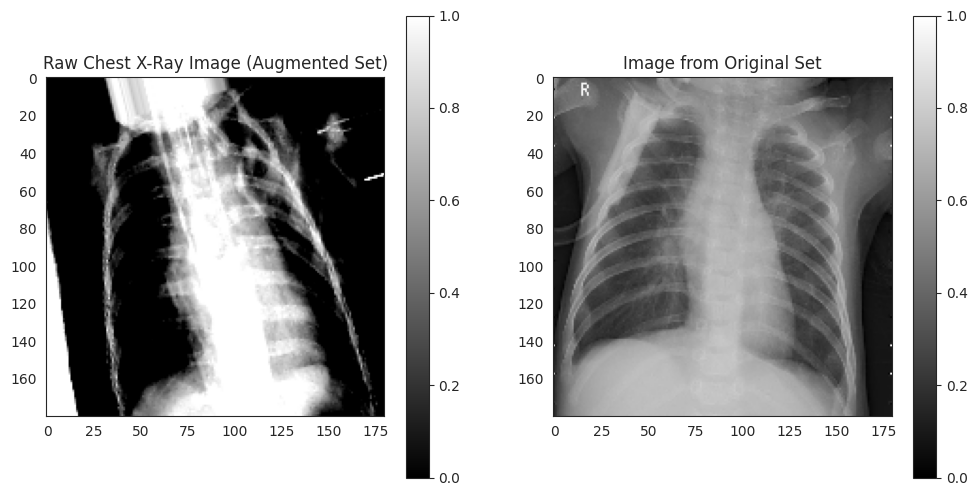

Information about the displayed image from 'Original' set:
The dimensions are 180 pixels width and 180 pixels height, one color channel.
The maximum pixel value is 2.7272, the minimum is -3.3835.
The mean pixel value is 0.0000, and the standard deviation is 1.0000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style to 'white' for a clean appearance
sns.set_style('white')

# Displaying a raw chest X-ray image from the 'train_no' set
generated_image, label = train.__getitem__(10)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X-Ray Image (Augmented Set)')

# Displaying an image from the 'train' set
plt.subplot(1, 2, 2)
train_image, _ = train_no.__getitem__(10)
plt.imshow(train_image[0], cmap='gray')
plt.colorbar()
plt.title('Image from Original Set')

# Show the plotted images
plt.show()

# Print information about the displayed image from 'train_no' set
print("Information about the displayed image from 'Original' set:")
print(f"The dimensions are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f}, the minimum is {generated_image.min():.4f}.")
print(f"The mean pixel value is {generated_image.mean():.4f}, and the standard deviation is {generated_image.std():.4f}")


* ###  Distribution of Data in Train-Validation-Test Sets after augmentation

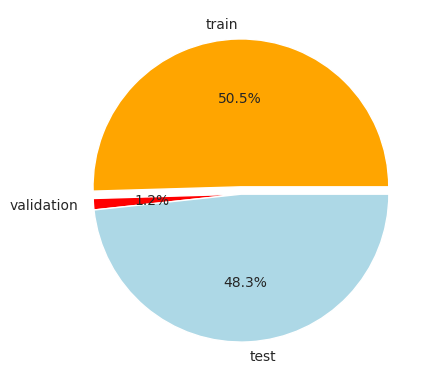

In [15]:
plt.pie([len(train), len(val), len(test)],
        labels=['train', 'validation', 'test'], autopct='%.1f%%', colors=['orange', 'red', 'lightblue'], explode=(0.05, 0, 0))
plt.savefig('pie.png',dpi=300)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(-12.555555555555555, 0.5, '# Pixels in Image')

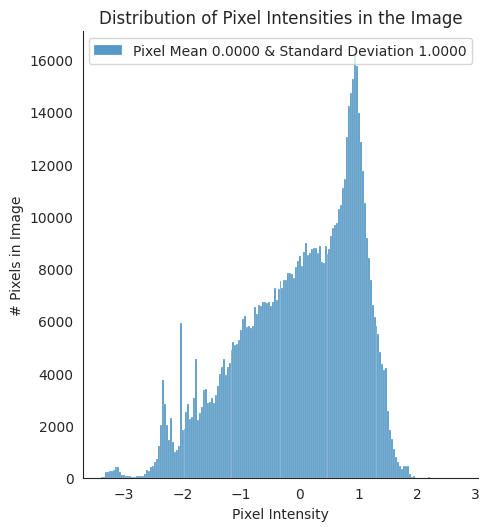

In [16]:
sns.displot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [17]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [18]:
def model_train(model, train_data, validation, class_weight):
    r = model.fit(
        train_data,
        epochs=10,
        validation_data=validation,
        class_weight=class_weight,
        steps_per_epoch=100,
        validation_steps=len(validation),
    )
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='Val_Loss')
    plt.legend()
    plt.title('Loss Evolution')

    # Use 'accuracy' and 'val_accuracy' for TensorFlow 2.x
    plt.subplot(2, 2, 2)
    plt.plot(r.history['accuracy'], label='Accuracy')
    plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
    plt.legend()
    plt.title('Accuracy Evolution')

    return r

### Model Evaluation Function

In [19]:
def model_eval(model, train_data, test_data):
  evaluation = model.evaluate(train_data)
  print(f"Train Accuracy: {evaluation[1] * 100:.2f}%\n")
  print(f"Train Loss: {evaluation[0]}%\n")
  pred = model.predict(test_data)
  evaluation = model.evaluate(test_data)
  print(f"Test Accuracy: {evaluation[1] * 100:.2f}%\n")
  print(f"Test Loss: {evaluation[0]}%\n")

  

  print("Confusion Matrix:", confusion_matrix(test.classes, pred > 0.5))
  report = pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))
  return (pred,report)

# 3. Transfer Learning

### MobileNetV2 Image Classification Model


In [20]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import backend as K

# Load MobileNetV2 with pre-trained weights
base_model = MobileNetV2(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

# Print the summary of the base model i.e. MobileNetV2
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 90, 90, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 90, 90, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 90, 90, 32)           0         ['bn_Conv1[

In [21]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 155 layers


In [22]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1280), dtype=tf.float32, name=None), name='global_average_pooling2d/Mean:0', description="created by layer 'global_average_pooling2d'")


In [23]:
for layer in base_model.layers:
    layer.trainable = False

In [24]:
# Define additional layers for image classification
base_output = base_model.output

dense_layer = Dense(128, activation='relu')(base_output)

predictions = Dense(1, activation='sigmoid')(dense_layer)

# Create the transfer learning model
t_model = Model(inputs=base_model.input, outputs=predictions)

# Print the summary of the model
t_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 90, 90, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 90, 90, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 90, 90, 32)           0         ['bn_Conv1[0][0]']        

In [25]:
# to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss',patience=7)
lr = ReduceLROnPlateau(monitor='val_loss',patience=5)

# Compile the model
t_model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

Epoch 1/10
100/100 [==============================] - 18s 127ms/step - loss: 0.1353 - accuracy: 0.8537 - val_loss: 0.4373 - val_accuracy: 0.8125
Epoch 2/10
100/100 [==============================] - 12s 124ms/step - loss: 0.0597 - accuracy: 0.9413 - val_loss: 0.5304 - val_accuracy: 0.7500
Epoch 3/10
100/100 [==============================] - 12s 118ms/step - loss: 0.0605 - accuracy: 0.9362 - val_loss: 0.7046 - val_accuracy: 0.6875
Epoch 4/10
100/100 [==============================] - 12s 123ms/step - loss: 0.0901 - accuracy: 0.9137 - val_loss: 0.3123 - val_accuracy: 0.8750
Epoch 5/10
100/100 [==============================] - 12s 121ms/step - loss: 0.0522 - accuracy: 0.9450 - val_loss: 0.6000 - val_accuracy: 0.8125
Epoch 6/10
100/100 [==============================] - 12s 124ms/step - loss: 0.0707 - accuracy: 0.9325 - val_loss: 0.3257 - val_accuracy: 0.8750
Epoch 7/10
100/100 [==============================] - 12s 121ms/step - loss: 0.0612 - accuracy: 0.9287 - val_loss: 0.4238 - val_ac

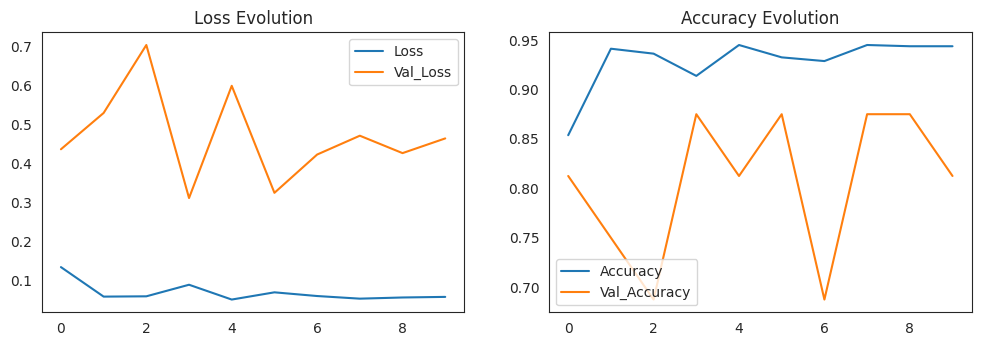

In [26]:
history = model_train(t_model,
    train,
    validation=val,
    class_weight=class_weight)

### Evaluate The Model that use MobileNetV2

In [27]:
pred , report = model_eval(t_model, train, test)

652/652 [==============================] - 78s 119ms/step - loss: 0.1106 - accuracy: 0.9597
Train Accuracy: 95.97%

Train Loss: 0.11056321859359741%

624/624 [==============================] - 10s 16ms/step - loss: 0.4647 - accuracy: 0.8381
Test Accuracy: 83.81%

Test Loss: 0.464733362197876%

Confusion Matrix: [[140  94]
 [ 10 380]]


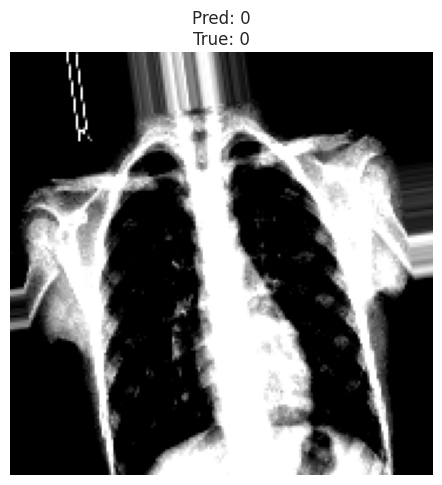

In [29]:
true_labels = test.classes
# Visualize one sample of prediction vs true label
sample_index = 0  # Change this to the index of the sample you want to visualize

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.imshow(test[sample_index][0][0], cmap='gray')

# Extract numeric value from prediction
pred_value = tf.keras.backend.get_value(pred[sample_index])

# Apply a threshold to determine the predicted class (assuming binary classification)
threshold = 0.5  # You can adjust this threshold based on your model's characteristics
predicted_class = 1 if pred_value > threshold else 0

plt.title(f"Pred: {predicted_class}\nTrue: {true_labels[sample_index]}")
plt.axis('off')

# Save the figure to a file with high quality (e.g., in PNG format with 300 DPI)
plt.savefig('sample_prediction_comparison.png', dpi=300)

# Show the plot
plt.show()

* ### Show some samples of predicted images vs True class

16/16 [==============================] - 0s 16ms/step


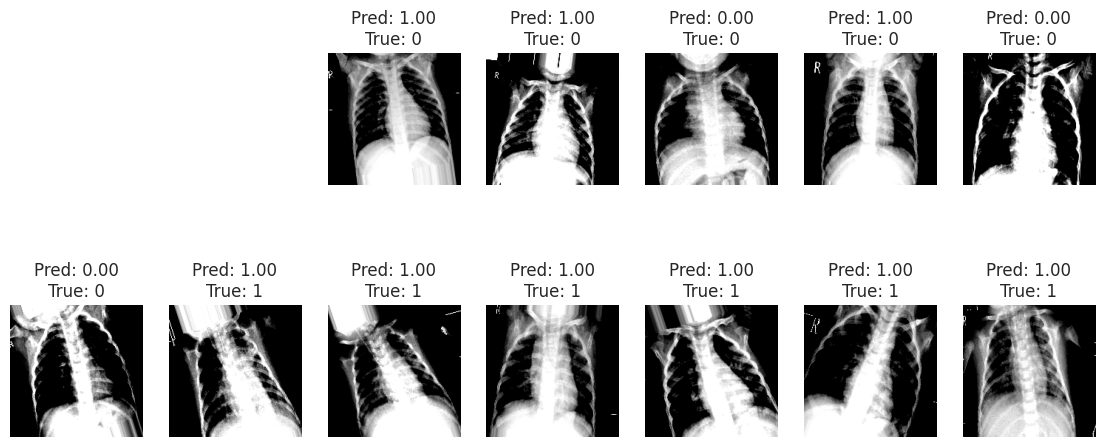

In [30]:
# Get true labels from the test set generator
true_labels = val.classes

# Visualize a sample of predictions vs true labels
sample_size = 14  # Change this based on how many samples you want to visualize
preds = t_model.predict(val)
plt.figure(figsize=(14, 6))
for i in range(2,sample_size):
    plt.subplot(2, sample_size // 2, i + 1)
    plt.imshow(val[i][0][0], cmap='gray')  # Display the image
#     print(test)
    # Extract numeric value from prediction
    pred_value = tf.keras.backend.get_value(preds[i])
    # Apply a threshold to determine the predicted class (assuming binary classification)
    threshold = 0.5  # You can adjust this threshold based on your model's characteristics
    predicted_class = 1 if pred_value > threshold else 0
    plt.title(f"Pred: {predicted_class:.2f}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.savefig('samples.png',dpi=300)
plt.show()

* # ResNet

In [31]:
from keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet', pooling="avg")

In [32]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 186, 186, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 90, 90, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 90, 90, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [33]:
for layer in resnet_base_model.layers:
    layer.trainable = False

In [34]:
    resnet_model = tf.keras.Sequential([
        resnet_base_model,
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)


Epoch 1/10
100/100 [==============================] - 20s 134ms/step - loss: 0.2951 - accuracy: 0.5925 - precision: 0.8204 - recall: 0.5729 - val_loss: 0.7785 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 2/10
100/100 [==============================] - 12s 121ms/step - loss: 0.2419 - accuracy: 0.6313 - precision: 0.8892 - recall: 0.5971 - val_loss: 0.8918 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/10
100/100 [==============================] - 13s 126ms/step - loss: 0.2241 - accuracy: 0.6875 - precision: 0.8971 - recall: 0.6443 - val_loss: 0.8416 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 4/10
100/100 [==============================] - 13s 127ms/step - loss: 0.2207 - accuracy: 0.6825 - precision: 0.9044 - recall: 0.6318 - val_loss: 0.6432 - val_accuracy: 0.6875 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 5/10
100/100 [==============================] - 13s 128ms/step - loss: 0.2077 - accura

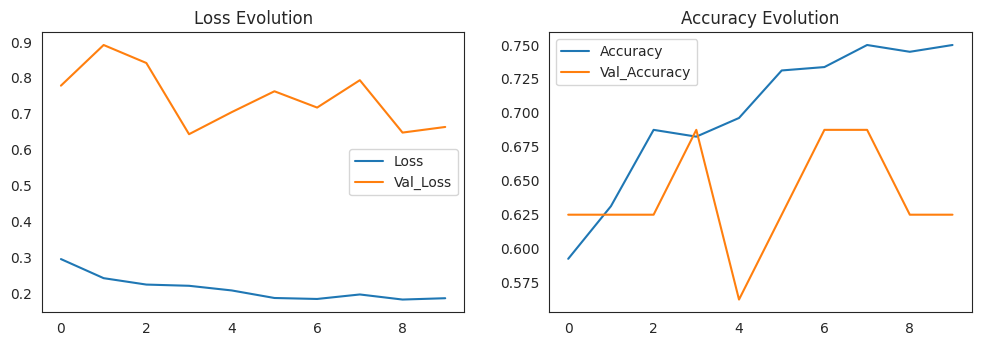

In [36]:
res = model_train(resnet_model, train, val, class_weight)

In [38]:
print(res.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


/tmp/ipykernel_4530/875725723.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


Text(0.5, 1.0, 'Accuracy Evolution')

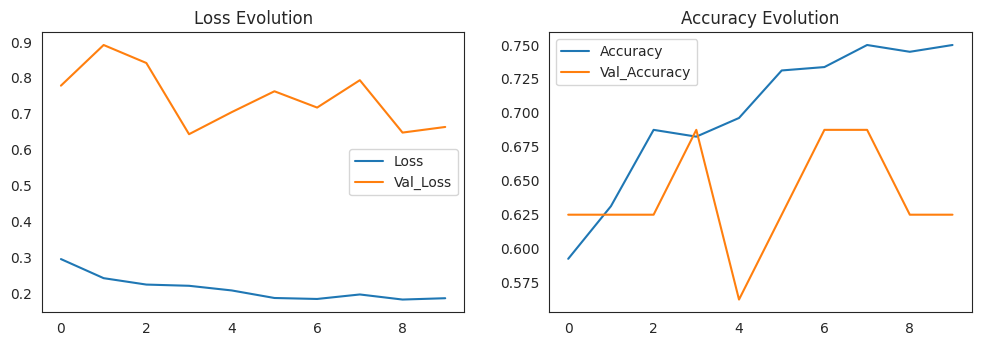

In [39]:
plt.figure(figsize=(12, 8))
plt.title('EVALUATION OF ResNet')

plt.subplot(2, 2, 1)
plt.plot(res.history['loss'], label='Loss')
plt.plot(res.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(res.history['accuracy'], label='Accuracy')
plt.plot(res.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [40]:
report = model_eval(resnet_model, train, test)

652/652 [==============================] - 78s 119ms/step - loss: 0.3662 - accuracy: 0.8554 - precision: 0.9809 - recall: 0.8214
Train Accuracy: 85.54%

Train Loss: 0.36615651845932007%

624/624 [==============================] - 10s 16ms/step - loss: 0.4280 - accuracy: 0.8109 - precision: 0.8523 - recall: 0.8436
Test Accuracy: 81.09%

Test Loss: 0.4280187785625458%

Confusion Matrix: [[181  53]
 [ 62 328]]
